# K Arm bandit problem

### 10 Arm bandit testbed

Create a set of 2000 randomly generated 10-arm bandit models. Each row store the model of the k armed bandit(a slot machine with k arm), each cell in the row store the true expected value of reward given by each of the k possible actions that the agent(player) can do on the bandit(pull one of the k levers), this true expected value(true mean) is distributed normally with mean 0 variance 1.

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
n = 2000
k = 10
models = np.random.normal(0.0, 1.0, size=(n, k))
models[0:1,:]

array([[ 0.44595874,  0.38255744,  1.39907523,  0.24230549,  0.05138344,
        -0.81004484, -0.21873875, -0.80490099, -1.03582863, -0.17883456]])

In [24]:
#bandit return the actual reward from the true model
def bandit(row, a):
    r = models[row, a] + np.random.normal()
    return r

# Action value methods

### e-greedy method incremental implementation

Greedy action q*a(t) action with maximum rewards






In [26]:
#greedy action index
q_opt = np.argmax(models, 1) #max along the columns (max of the each row)
print(q_opt[0:1], models[0, q_opt[0]])


[2] 1.3990752296361515


In [31]:
#e-greedy method
def epsilon_greedy(Q, epsilon):
    if np.random.sample() < epsilon:
         a = np.random.choice(range(10))
    else:
        a = np.argmax(Q)
     
    return a


The estimator of the action values is the averages of the observed rewards for each action. To compute these estimator with the minimum computational cost, we apply an incremental formula for updating averages with small constant computation required to process each new reward

In [33]:
def update_rule(old_estimate, target, step_size):
    new_estimate = old_estimate + step_size*(target - old_estimate)
    return new_estimate

In [35]:
Qs = np.zeros(shape=(n, k))
num_steps = 1000
epsilon = 0.1

#ratio for plotting performance
ratio_est_vs_opt = np.zeros(shape=(n, num_steps))
#accumulators for plotting performance
rewards_accum = np.zeros(shape=(n, num_steps))
opt_rewards_accum = np.zeros(shape=(n, num_steps)) + 1/10**6

#for each model
for i in range(n):
    N = np.zeros(k) #action counters
    
    for t in range(num_steps):
        #estimate best action based on the estimated action value using e-greedy method
        a = epsilon_greedy(Qs[i,:], epsilon)
        
        #act and collect the actual reward from the bandit
        reward = bandit(i, a)
        
        #update our estimate of the action value
        
        N[a] += 1
        Qs[i, a] = update_rule(Qs[i, a], reward, 1/N[a])
        
        #store the accumulators to calculate the ratio of the epsilon greedy vs optimal at each state for plotting
        
        if t > 0:
            rewards_accum[i, t] = rewards_accum[i, t-1] + reward
            opt_rewards_accum[i, t] = opt_rewards_accum[i, t-1] + bandit(i, q_opt[i])
            
            #compute ratio of cummulative rewards
            #mean along the row
            
avg_rewards_accum = np.mean(rewards_accum, 0)
avg_opt_rewards_accum = np.mean(opt_rewards_accum, 0)

#average performance over all the models
avg_ratio_est_vs_opt = avg_rewards_accum / avg_opt_rewards_accum


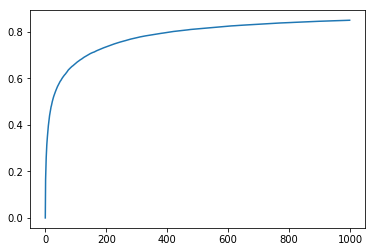

In [36]:
plt.plot(avg_ratio_est_vs_opt)